# PCA-Like dimension reduction with an autoencoder

See

"Hands on Machine Learning with Scikit-Learn, Keras and Tensorflow, 2nd Edition",  A. Geron,  O'Reilly

Checked on 1/18/2023,  runs file in Google Colab

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
from tensorflow import keras

encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.1))

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=400, centers=4, n_features=3, random_state=0)



In [4]:
X.shape

(400, 3)

In [5]:
type(X)

numpy.ndarray

### Standard scaling was vital here,  without it the autoencoder would not train properly,  it generated NaNs in the output

In [7]:
from sklearn.preprocessing import StandardScaler
my_scaler=StandardScaler()
X=my_scaler.fit_transform(X)

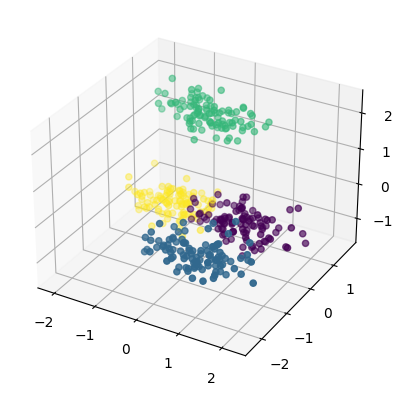

In [8]:
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],c=y)

In [9]:
history = autoencoder.fit(X, X, epochs=20)
codings = encoder.predict(X)

Epoch 1/20
13/13 [==============================] - 2s 7ms/step - loss: 1.2223
Epoch 2/20
13/13 [==============================] - 0s 6ms/step - loss: 0.9120
Epoch 3/20
13/13 [==============================] - 0s 7ms/step - loss: 0.7561
Epoch 4/20
13/13 [==============================] - 0s 14ms/step - loss: 0.6635
Epoch 5/20
13/13 [==============================] - 0s 11ms/step - loss: 0.6068
Epoch 6/20
13/13 [==============================] - 0s 7ms/step - loss: 0.5683
Epoch 7/20
13/13 [==============================] - 0s 8ms/step - loss: 0.5403
Epoch 8/20
13/13 [==============================] - 0s 11ms/step - loss: 0.5190
Epoch 9/20
13/13 [==============================] - 0s 12ms/step - loss: 0.5014
Epoch 10/20
13/13 [==============================] - 0s 7ms/step - loss: 0.4855
Epoch 11/20
13/13 [==============================] - 0s 4ms/step - loss: 0.4707
Epoch 12/20
13/13 [==============================] - 0s 4ms/step - loss: 0.4563
Epoch 13/20
13/13 [==========================

Text(0.5, 1.0, '2D projection of 3d Blob distribution')

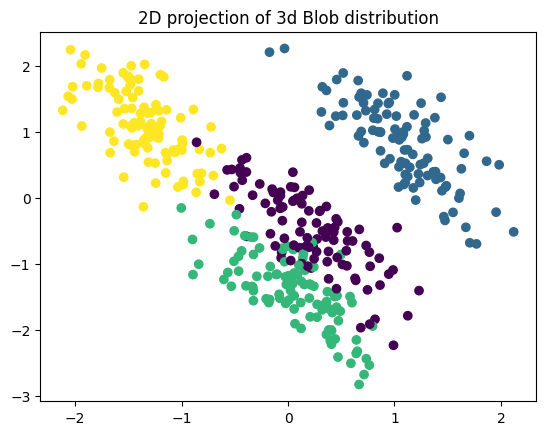

In [10]:
plt.scatter(codings[:,0],codings[:,1],c=y)
plt.title('2D projection of 3d Blob distribution')

### How about higher dimensions?
Alter the encoder to handle higher input dimensions

In [12]:

input_dim=4
reduction_dim=2

encoder2 = keras.models.Sequential([keras.layers.Dense(reduction_dim, input_shape=[input_dim])])
decoder2 = keras.models.Sequential([keras.layers.Dense(input_dim, input_shape=[reduction_dim])])
autoencoder2 = keras.models.Sequential([encoder2, decoder2])

autoencoder2.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.1))

In [13]:
X2, y2 = make_blobs(n_samples=400, centers=4, n_features=4, random_state=0)

my_scaler2=StandardScaler()
X2=my_scaler2.fit_transform(X2)

In [14]:
history2 = autoencoder2.fit(X2, X2, epochs=20)
codings2 = encoder2.predict(X2)

Epoch 1/20
13/13 [==============================] - 1s 2ms/step - loss: 0.9088
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.6094
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4443
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 0.3428
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.2759
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 0.2292
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1958
Epoch 8/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1708
Epoch 9/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1518
Epoch 10/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1372
Epoch 11/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1258
Epoch 12/20
13/13 [==============================] - 0s 2ms/step - loss: 0.1168
Epoch 13/20
13/13 [==============================

Text(0.5, 1.0, '2D projection of 4d Blob distribution')

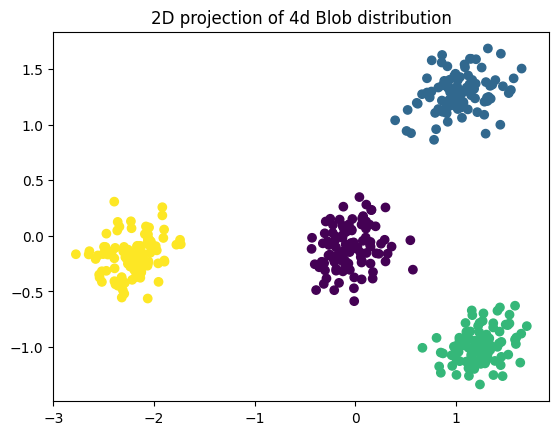

In [15]:
plt.scatter(codings2[:,0],codings2[:,1],c=y2)
plt.title('2D projection of 4d Blob distribution')

In [16]:
# note that we actually got better spliting going from 3d to 4d in the original data.   I think there is more room to separate the blobs in 4D than in 3D